In [0]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
import pandas as pd
from keras.callbacks import ModelCheckpoint
from google.colab import files

N_EPOCH = 10
BATCH_SIZE = 5
VERBOSE = 1
N_CLASS = 10
OPTIMIZER = Adam()
N_HIDDEN_1 = 128
VALIDATION_SPLIT = 0.1
RESHAPE = 784
DROPOUT = 0.1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x1 = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/Brain_EEG/calculation.csv")
x2 = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/Brain_EEG/boring.csv")

In [53]:
print(x1.shape, x2.shape)

(164081, 6) (180089, 6)


In [54]:
X = np.concatenate((x1, x2), axis=0)
X.shape

(344170, 6)

In [0]:
temp = X[1:3,:]

In [56]:
X = np.concatenate((X, temp), axis=0)
X.shape

(344172, 6)

In [58]:
X = X.reshape(172,2001,6)
X.shape

(172, 2001, 6)

In [59]:
y1 = list()
y2 = list()
for i in range(82):
  y1.append(0)

for i in range(90):
  y2.append(1)

y1 = np.array(y1)
y2 = np.array(y2)

print(y1.shape, y2.shape)

(82,) (90,)


In [60]:
y = np.concatenate((y1, y2), axis=None)
print(X.shape, y.shape)

(172, 2001, 6) (172,)


In [0]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(2001, 6)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(trainX, trainy, batch_size=1, epochs=10)
score = model.evaluate(testX, testy, batch_size=1)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 2001
features = 6

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, features)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(trainX, trainy, batch_size=1, epochs=10)
score = model.evaluate(testX, testy, batch_size=1)

Epoch 1/10
115/115 [==============================] - 3s 22ms/step - loss: 1.8080 - accuracy: 0.5217
Epoch 2/10
115/115 [==============================] - 2s 19ms/step - loss: 0.8632 - accuracy: 0.5304
Epoch 3/10
115/115 [==============================] - 2s 20ms/step - loss: 0.8707 - accuracy: 0.5130
Epoch 4/10
115/115 [==============================] - 2s 20ms/step - loss: 0.7662 - accuracy: 0.5130
Epoch 5/10
115/115 [==============================] - 2s 20ms/step - loss: 0.7573 - accuracy: 0.4696
Epoch 6/10
115/115 [==============================] - 2s 20ms/step - loss: 0.7548 - accuracy: 0.4696
Epoch 7/10
115/115 [==============================] - 2s 20ms/step - loss: 0.7493 - accuracy: 0.5043
Epoch 8/10
115/115 [==============================] - 2s 19ms/step - loss: 0.7125 - accuracy: 0.5304
Epoch 9/10
115/115 [==============================] - 2s 19ms/step - loss: 0.7246 - accuracy: 0.4087
Epoch 10/10
57/57 [==============================] - 0s 6ms/step


In [17]:
a = [ [1, 2, 3, 4, 5, 6],
     [ 10, 20, 30, 40, 50, 60]]

a = np.array(a)
a.shape

(2, 6)

In [0]:
a = a.reshape(2,3,2)

In [20]:
a


array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[10, 20],
        [30, 40],
        [50, 60]]])

In [21]:
b = [[1,2],
     [3,4],
     [5,6],
     [7,8],
     [9,10],
     [11,12]]

b = np.array(b)
print(b.shape)
b = b.reshape(2,3,2)
print(b.shape)
b

(6, 2)
(2, 3, 2)


array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

Using TensorFlow backend.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 32)   1568        input_1[0][0]                    
____________________________________________________________________________________________

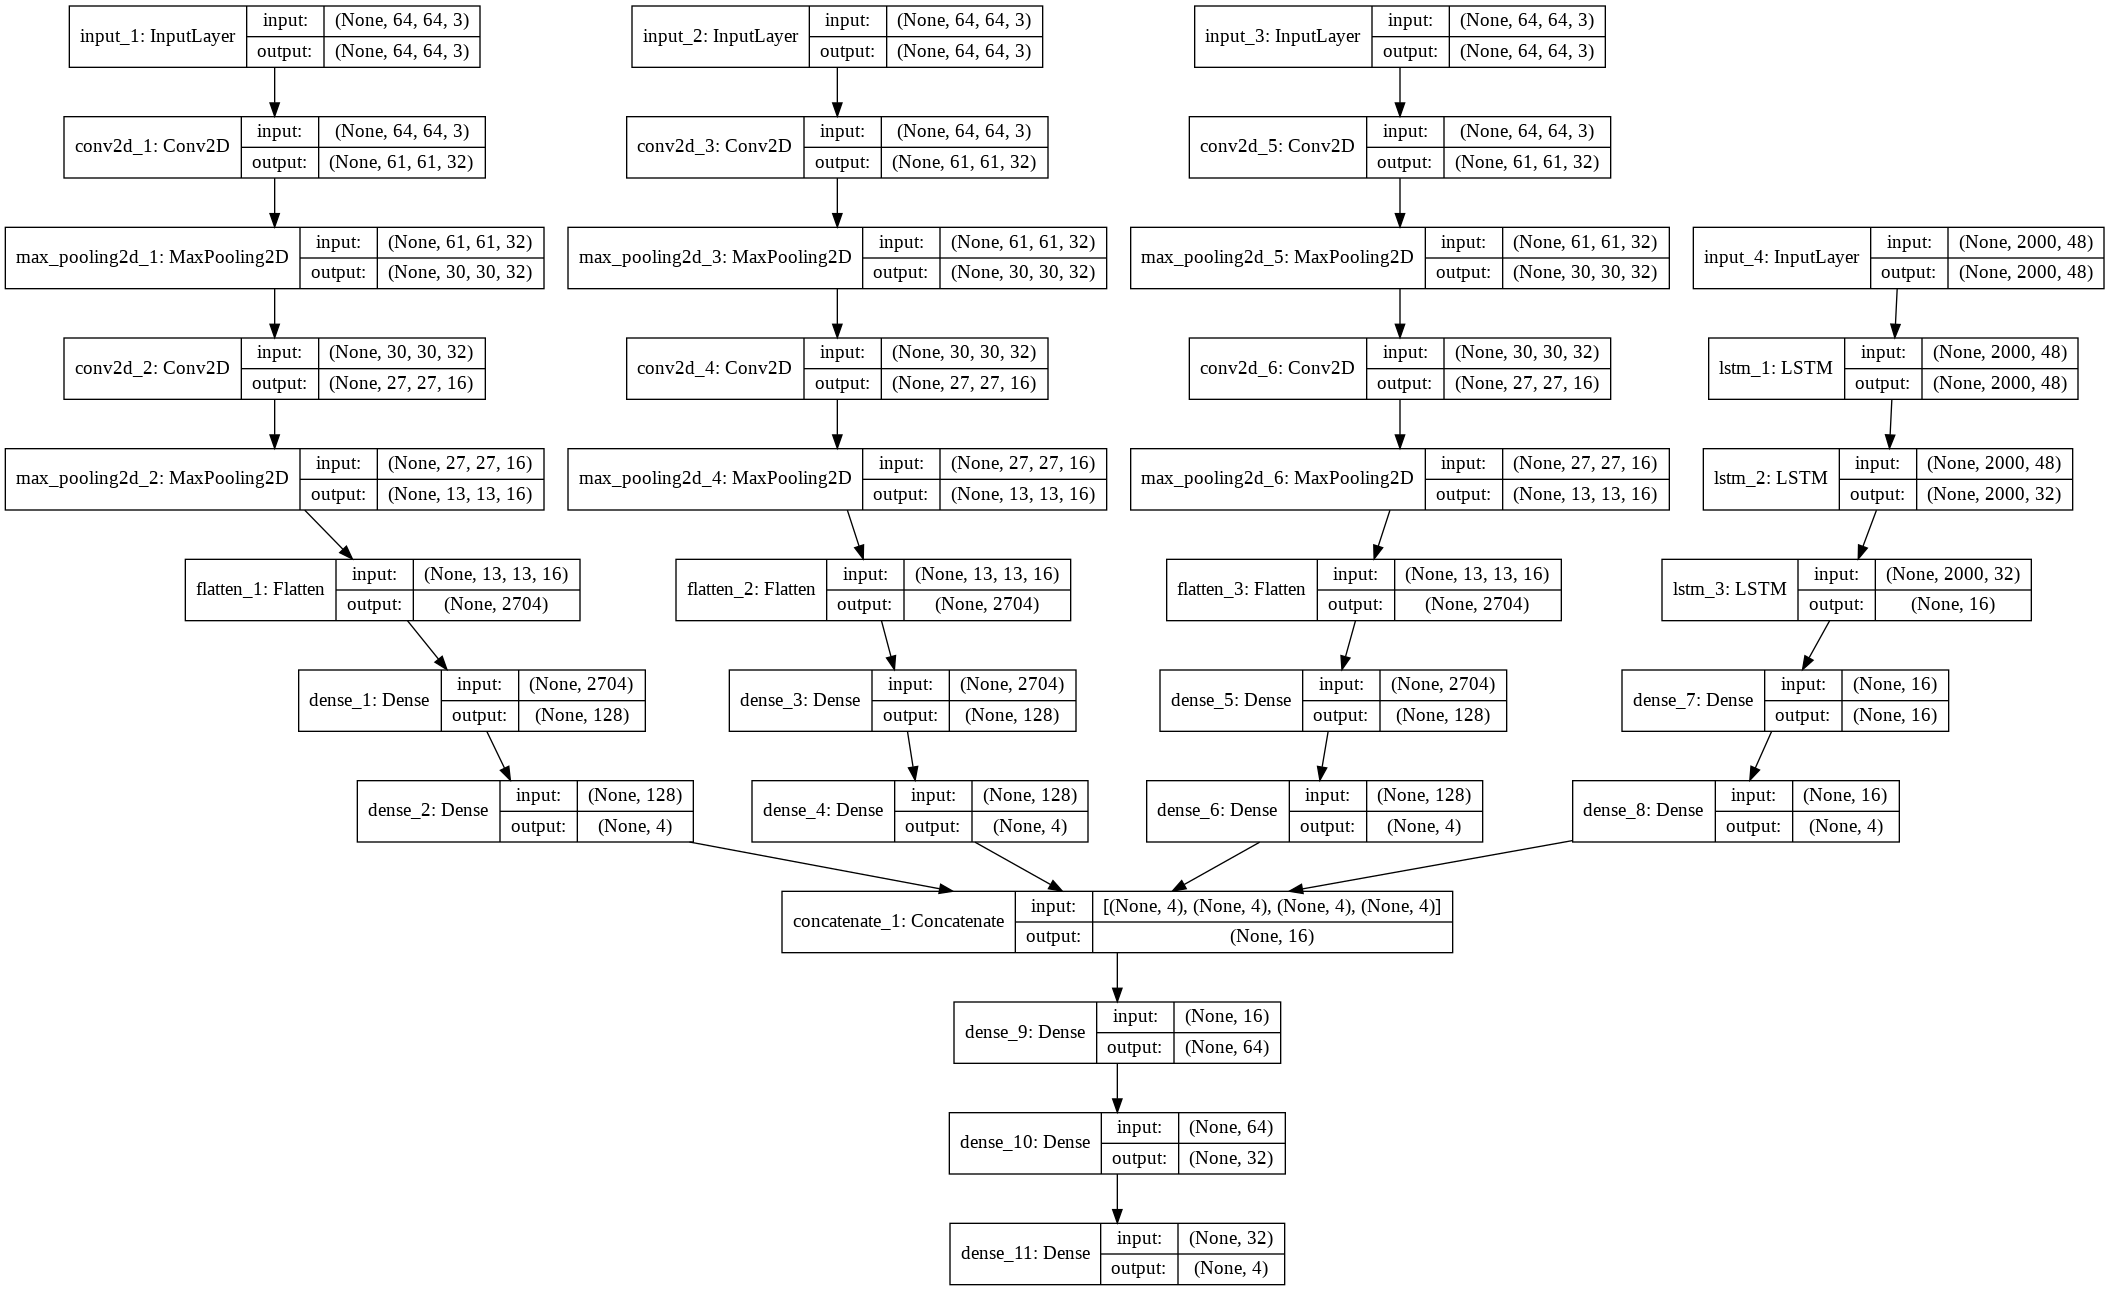

In [1]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM


visible1 = Input(shape=(64,64,3))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
dense11 = Dense(128, activation='relu')(flat1)
dense12 = Dense(4, activation='relu')(dense11)

visible2 = Input(shape=(64,64,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
dense21 = Dense(128, activation='relu')(flat2)
dense22 = Dense(4, activation='relu')(dense21)


visible3 = Input(shape=(64,64,3))
conv31 = Conv2D(32, kernel_size=4, activation='relu')(visible3)
pool31 = MaxPooling2D(pool_size=(2, 2))(conv31)
conv32 = Conv2D(16, kernel_size=4, activation='relu')(pool31)
pool32 = MaxPooling2D(pool_size=(2, 2))(conv32)
flat3 = Flatten()(pool32)
dense31 = Dense(128, activation='relu')(flat3)
dense32 = Dense(4, activation='relu')(dense31)

visible4 = Input(shape=(2000,48))
hidden41 = LSTM(48, activation='relu', return_sequences=True)(visible4)
hidden42 = LSTM(32, activation='relu', return_sequences=True)(hidden41)
hidden43 = LSTM(16, activation='relu')(hidden42)
hidden44 = Dense(16, activation='relu')(hidden43)
hidden45 = Dense(4, activation='relu')(hidden44)



merge = concatenate([dense12, dense22, dense32, hidden45])

hidden1 = Dense(64, activation='relu')(merge)
hidden2 = Dense(32, activation='relu')(hidden1)
output = Dense(4, activation='softmax')(hidden2)
model = Model(inputs=[visible1, visible2, visible3, visible4], outputs=output)

print(model.summary())
plot_model(model, show_shapes=True,to_file='model.png')



In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 100, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


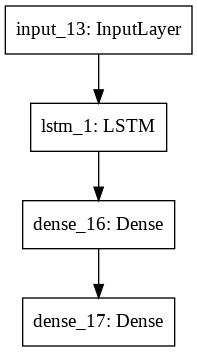

In [7]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM

visible4 = Input(shape=(100,1))
hidden41 = LSTM(10)(visible)
hidden42 = Dense(10, activation='relu')(hidden1)
output4 = Dense(1, activation='sigmoid')(hidden2)
model4 = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')